In [1]:
from PIL import Image
from pathlib import Path
import random
from IPython.display import display
from skimage import color
import numpy as np
import cv2

Dataset length: 1325
L shape: torch.Size([1, 256, 256])
ab shape: torch.Size([2, 256, 256])
Decade: 1930s


c:\Users\wwwab\Development\ChronoColor\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Batch - L shape: torch.Size([16, 1, 256, 256])
Batch - ab shape: torch.Size([16, 2, 256, 256])
Batch - decades: ('1950s', '1950s', '1960s', '1940s', '1950s', '1940s', '1960s', '1940s', '1930s', '1970s', '1950s', '1940s', '1930s', '1950s', '1960s', '1960s')
1930s: 265 images
1940s: 265 images
1950s: 265 images
1960s: 265 images
1970s: 265 images


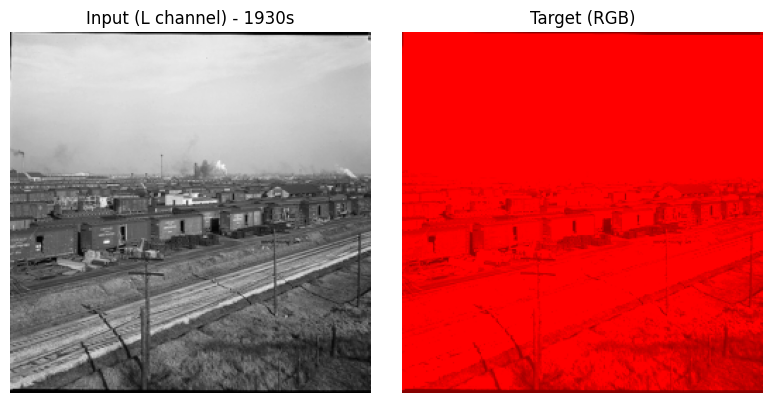

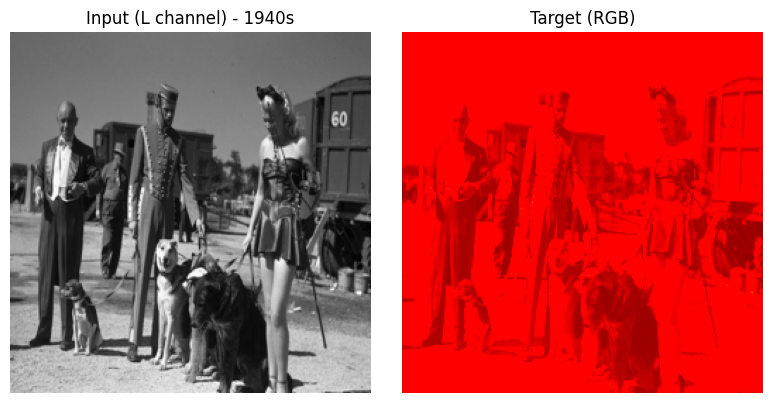

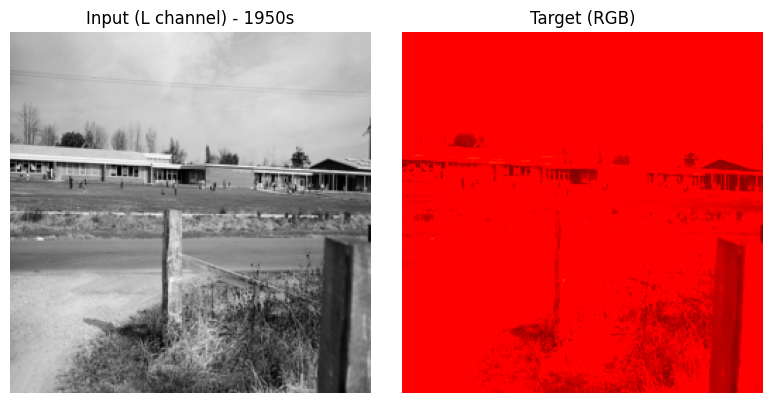

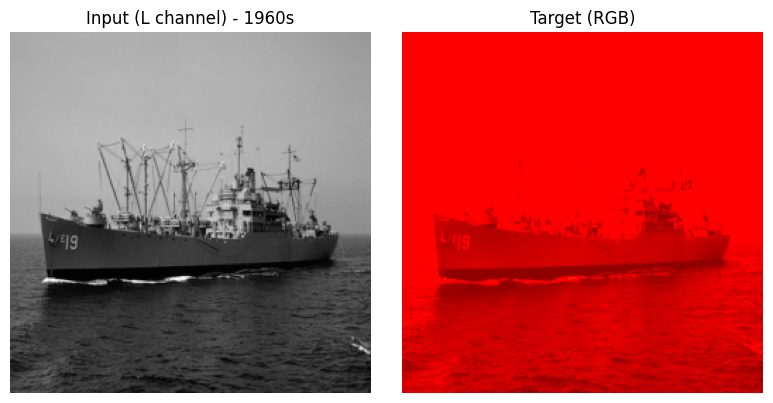

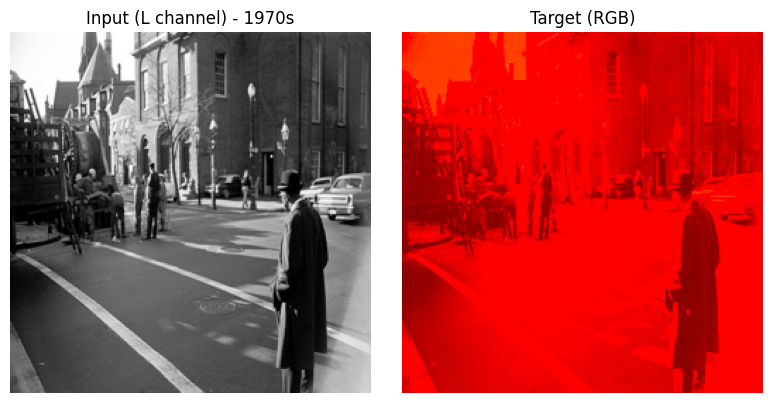

In [2]:
import sys
sys.path.append("..")

from src.config import config
from src.data_loading.datasets import HistoricalColorDataset, get_dataloaders, get_decade_dataloaders

import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

# 1. Test the dataset with decade folders
dataset = HistoricalColorDataset(root_dir=config.RAW_DATA_DIR, mode='train')
print(f"Dataset length: {len(dataset)}")

# Get a sample with decade information
L, ab, decade = dataset[0]
print(f"L shape: {L.shape}")
print(f"ab shape: {ab.shape}")
print(f"Decade: {decade}")

# 2. Test the dataloader
train_loader, val_loader, test_loader = get_dataloaders()

# Get a batch
for L_batch, ab_batch, decades_batch in train_loader:
    print(f"Batch - L shape: {L_batch.shape}")
    print(f"Batch - ab shape: {ab_batch.shape}")
    print(f"Batch - decades: {decades_batch}")
    break

# 3. Test decade-specific dataloaders
decade_loaders = get_decade_dataloaders()
for decade, loader in decade_loaders.items():
    print(f"{decade}: {len(loader.dataset)} images")

# 4. Visualize samples from different decades
def show_sample(L, ab, decade):
    """Convert L and ab back to RGB for visualization"""
    lab = torch.cat([L, ab], dim=0)
    lab[0] = (lab[0] + 1) * 50.0
    lab_np = lab.numpy().transpose(1, 2, 0).astype(np.float32)
    lab_np[:, :, 1:] = lab_np[:, :, 1:] + 128.0
    rgb = cv2.cvtColor(lab_np, cv2.COLOR_LAB2RGB)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(L[0], cmap='gray')
    plt.title(f'Input (L channel) - {decade}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(rgb)
    plt.title('Target (RGB)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show samples from each decade
for decade in config.DECADES:
    decade_dataset = HistoricalColorDataset(
        root_dir=config.RAW_DATA_DIR,
        mode='train',
        decades=[decade]
    )
    if len(decade_dataset) > 0:
        L, ab, decade = decade_dataset[0]
        show_sample(L, ab, decade)